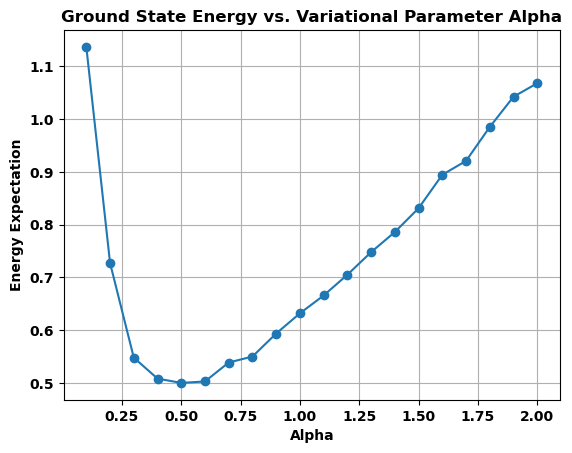

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trial_wavefunction(x, alpha):
    return np.exp(-alpha * x**2)

def local_energy(x, alpha):
    return alpha + x**2 * (0.5 - 2 * alpha**2)

def metropolis(x, alpha, delta):
    xt = x + delta * (2 * np.random.rand() - 1)
    omega = np.exp(-2 * alpha * (xt**2 - x**2))
    beta = np.random.rand()
    if omega > beta:
        return xt, local_energy(xt, alpha)
    else:
        return x, local_energy(x, alpha)

def quantum_monte_carlo(alpha, delta, num_samples, num_steps):
    x = 0.0
    sum_expectation = 0.0

    for _ in range(num_samples):
        expectation_values = []
        for _ in range(num_steps):
            x, local_energy_val = metropolis(x, alpha, delta)
            expectation_values.append(local_energy_val)
        sum_expectation += np.mean(expectation_values)

    energy_expectation = sum_expectation / num_samples

    return energy_expectation


alpha = 2
delta = 0.1
num_samples = 1000
num_steps = 1000

alpha_values = []
energy_values = []

for _ in range(20):
    energy_expectation = quantum_monte_carlo(alpha, delta, num_samples, num_steps)
    alpha_values.append(alpha)
    energy_values.append(energy_expectation)
    alpha -= 0.1

plt.plot(alpha_values, energy_values)
plt.title('Variational of Parameter Alpha with Energy')
plt.xlabel('Alpha')
plt.ylabel('Energy')
plt.show()


